<a href="https://colab.research.google.com/github/ChuLinh02/GraphMining/blob/main/HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSC17103 - Colab 2 - Đồ thị ngẫu nhiên & Các mô hình tạo sinh mạng**

Đây là Bài tập 02 trong môn học Khai thác Dữ liệu Đồ thị (Graph Mining) - CSC1703 tại Khoa Công nghệ Thông tin, Trường Đại học Khoa học Tự nhiên, Đại học Quốc gia TP.HCM

Một số thuật ngữ

| Tiếng Anh  | Mô tả  |
|---|---|
| Random graph  | Đồ thị ngẫu nhiên  |
| Generative network model  | Mô hình tạo sinh mạng lưới  |

(Cập nhật lần cuối: 27/05/2024)

Họ tên: Chu Hải Linh

MSSV: 21120496

## **Cách thực hiện và nộp bài tập**

&#9889; Chú ý, bạn nên thực hiện theo sự hướng dẫn dưới đây. Nếu có bất kỳ điều gì không rõ, bạn cần liên hệ ngay trợ giảng/ giáo viên thực hành để được hỗ trợ kịp thời.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```

**Cách nộp bài**

Trước khi nộp bài, bạn chọn `Kernel` - `Restart Kernel & Run All Cells` đối với trường hợp sử dụng môi trường local hoặc `Runtime` - `Restart session and run all` đối với môi trường Google Colab, để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (ví dụ, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `HW02.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại với định dạng nén là .zip (chứ không được là .rar hay các định dạng khác) và nộp ở link trên moodle. \
<font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài này.</font>

## Setup và Import các thứ

In [1]:
# Upgrade packages
!pip install --upgrade scipy networkx

In [2]:
# Import
import random
import numpy as np # For numerical computation
import networkx as nx # For network/ graph manipulation
import matplotlib.pyplot as plt # For visualization
import scipy.stats as st
from scipy.stats import ks_2samp
plt.style.use("fast")

%matplotlib inline

In [3]:
# Make sure something
assert nx.__version__ > '2.5'

## Phần 1: Đồ thị ngẫu nhiên (4đ)

### Task 1: Mô hình Erdős–Rényi (2đ)

Mô hình Erdős–Rényi là một mô hình được sử dụng cho phát sinh đồ thị ngẫu nhiên (random graphs) hay mạng ngẫu nhiên (random network). Trong mô hình này, tất cả các đồ thị với một tập đỉnh cố định với một số cố định cạnh được xem là tương đối giống nhau.

Có hai biến thể của mô hình đồ thị ngẫu nhiên Erdős–Rényi:
- Mô hình thứ nhất, ký hiệu là $G(n,M)$, một đồ thị được chọn một cách ngẫu nhiên từ tập tất cả các đồ thị mà có $n$ đỉnh và $M$ cạnh. Các đỉnh được coi là có nhãn, điều này có nghĩa là đồ thị nhận được từ bởi hóa vị các đỉnh được xem là phân biệt nhau.

Ví dụ 1: Xem xét mô hình $G(3, 2)$, có 3 đồ thị 2 cạnh trên ba đỉnh được gán nhãn (một cho mỗi sự lựa chọn của đỉnh giữa trong một đường đi hai cạnh), và mỗi một trong ba đồ thị được gắn với xác suất $\dfrac{1}{3}$

- Mô hình thứ hai, ký hiệu là $G(n, p)$, một đồ thị được xây dựng bằng cách nối các đỉnh được gán nhãn một cách ngẫu nhiên. Mỗi cạnh được đưa vào đồ thị với xác suất $p$, độc lập với mọi cạnh khác. Một cách tương đương, xác suất để sinh mỗi đồ thị mà có $n$ đỉnh và $M$ cạnh là:
$$
p^M(1-p)^{\binom{n}{2} - m}
$$
Tham số $p$ trong mô hình này có thể được hiểu như một hàm trọng (weighting function), khji $p$ tăng từ 0 đến 1, mô hình càng có xu hướng thêm nhiều cạnh vào đồ thị, và ngược lại.

<font color=DodgerBlue>Trong phần này, chúng ta sẽ thử cài đặt mô hình Erdős–Rényi với biến thể mỗi cặp của $n$ đỉnh được liên kết với nhau với một xác suất cố định.</font>

Các bạn cần hoàn thành hàm `randomEdgesGenerator` với các tham số:
- `nodes` (np.array): một mảng numpy chứa các chỉ số đỉnh. Ví dụ: `[1, 2, 3, 4]`
- `p` (float): xác suất của liên kết (có giá trị thực, chạy từ 0 tới 1).
Hàm này trả về một mảng numpy (np.array) với các tuples có dạng `[(1, 2), (2, 4)]`, trong đó `1-2` là một cạnh nên được thêm vào đồ thị.

In [4]:
def randomEdgesGenerator(nodes: np.ndarray, p: float) -> np.array:
    """Hàm phát sinh danh sách cạnh ngẫu nhiên

    Parameters
    ----------
    nodes
        (np.array): một mảng numpy chứa các chỉ số đỉnh. Ví dụ: `[1, 2, 3, 4]`
    p
        (float): xác suất của liên kết (có giá trị thực, chạy từ 0 tới 1).

    Returns
    -------
        (np.array) với các tuples có dạng `[(1, 2), (2, 4)]`, trong đó `1-2` là một cạnh nên được thêm vào đồ thị.
    """
    # YOUR CODE HERE
    edges = []
    for i in range(len(nodes)):
      for j in range(i + 1, len(nodes)):
        # Take random number r
        r = random.random()
        # If r < p, add the edge
        if (r < p):
          edges.append((nodes[i], nodes[j]))
    return np.array(edges)


In [5]:
# My cell for testing
nodes = np.array([1, 2, 3, 4])
p = 0.1
edges = randomEdgesGenerator(nodes, p)
print(edges)

[]


In [6]:
def ERModelGenerator(n: int, p: float) -> nx.Graph:
    """Hàm phát sinh đồ thị ngẫu nhiên dựa trên mô hình Erdős–Rényi

    Parameters
    ----------
    n
        số đỉnh của đồ thị
    p
        xác suất liên kết

    Returns
    -------
        (nx.Graph) đồ thị ngẫu nhiên
    """
    G = nx.Graph()
    nodes = np.arange(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(randomEdgesGenerator(nodes, p))
    return G

In [7]:
# Test 01
assert len(ERModelGenerator(100, 0.1).edges) > 0

In [8]:
# Test 02
n = 100
p = 0.4
n_edges = n * (n - 1) / 2
q = 1 - p
sigma = np.sqrt((p * q) / n_edges)
assert (
    p - 3 * sigma
    < randomEdgesGenerator(np.arange(n), p).shape[0] / n_edges
    < p + 3 * sigma
)

In [9]:
# Test 03
n = 1000
p = 0.01
n_edges = n * (n - 1) / 2
q = 1 - p
sigma = np.sqrt((p * q) / n_edges)
assert (
    p - 3 * sigma
    < randomEdgesGenerator(np.arange(n), p).shape[0] / n_edges
    < p + 3 * sigma
)

In [10]:
# Test 04
n = 300
p = 0.9
n_edges = n * (n - 1) / 2
q = 1 - p
sigma = np.sqrt((p * q) / n_edges)
assert (
    p - 3 * sigma
    < randomEdgesGenerator(np.arange(n), p).shape[0] / n_edges
    < p + 3 * sigma
)

Trực quan hóa các trường hợp trạng thái mạng lưới.

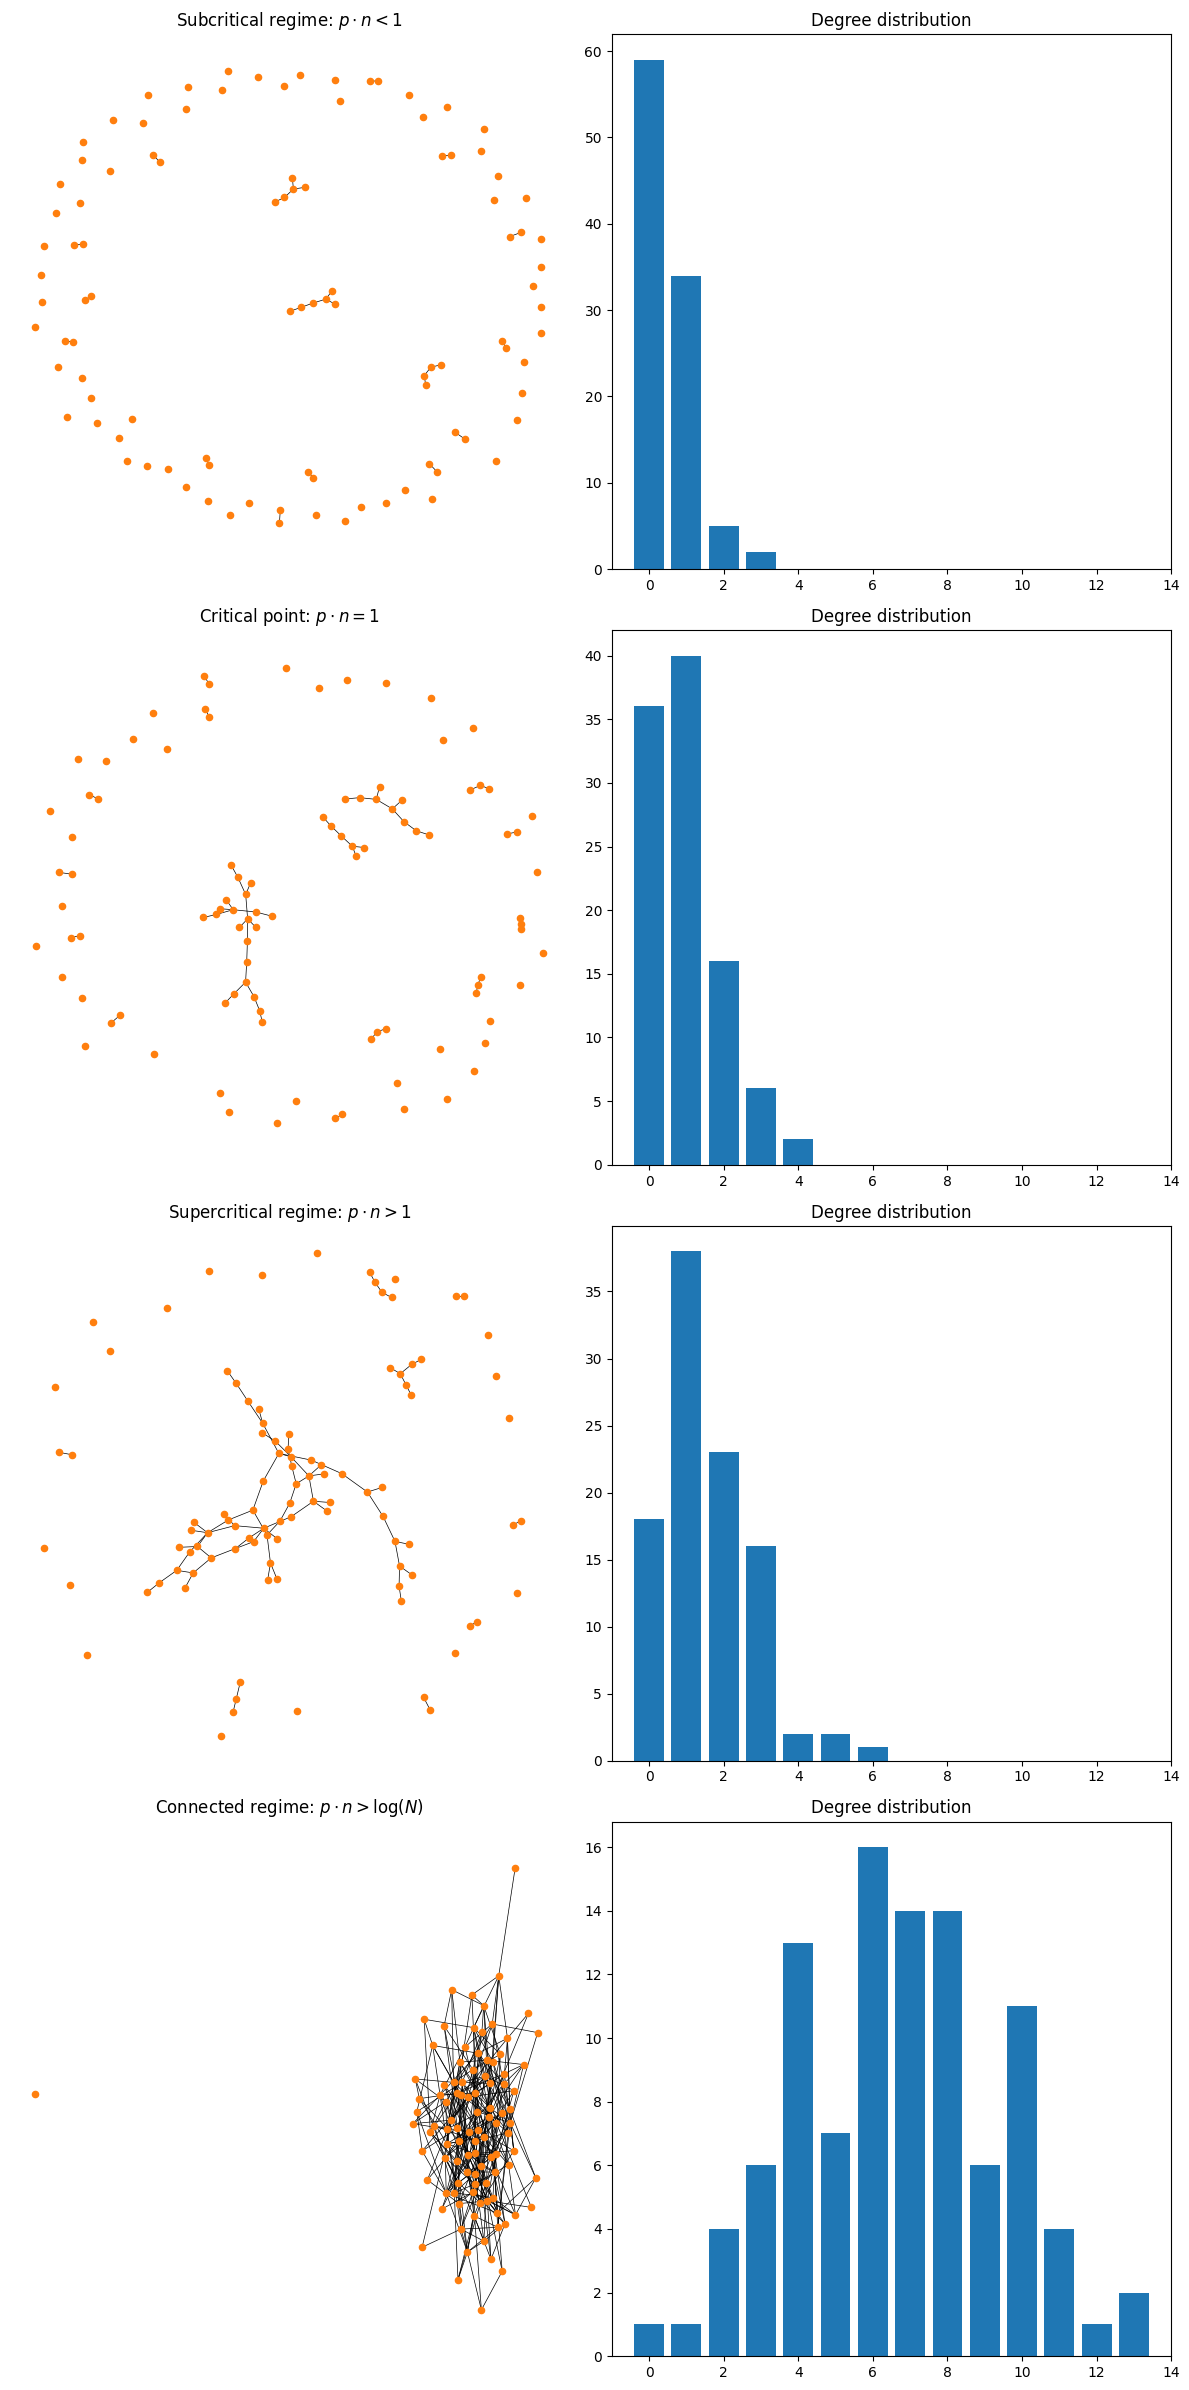

In [11]:
n = 100
cases = [
    (r'Subcritical regime: $p \cdot n < 1$', n, 0.5 / n),
    (r'Critical point: $p \cdot n = 1$', n, 1 / n),
    (r'Supercritical regime: $p \cdot n > 1$', n, 2 / n),
    (r'Connected regime: $p \cdot n > \log(N)$', n, 6.5 / n)
]

plt.figure(figsize=(12, 24))

for i, (regime, n, p) in enumerate(cases):
    G = ERModelGenerator(n, p)

    # Plot the graph
    plt.subplot(4, 2, 2 * i + 1)
    nx.draw(G, with_labels=False, node_size=20, width=0.5, node_color='tab:orange')
    plt.title(regime)

    # Plot the degree distribution
    plt.subplot(4, 2, 2 * i + 2)
    degree_seq = [degree for node, degree in G.degree]
    bins, freq = np.unique(degree_seq, return_counts=True)
    plt.bar(bins, freq)
    plt.xlim(-1, 14)
    plt.title('Degree distribution')

plt.tight_layout()
plt.show()

Nhận xét của bạn (nếu có)

YOUR ANSWER HERE

Biểu đồ trực quan hóa là minh họa cho 4 trạng thái của mô hình Erdős–Rényi (ER). Các trạng thái khác nhau được xác định bởi giá trị của $p \cdot n$, trong đó $p$ là xác suất giữa mỗi cặp đỉnh và $n$ là số đỉnh.

---
### **1. Subcritical regime $(p \cdot n < 1)$**

- **Đồ thị** (trái):
  - Các đỉnh được kết nối rất thưa thớt.
  - Đồ thị chứa nhiều thành phần liên thông nhỏ, đa số các đỉnh cô lập hoặc chỉ có một cạnh kết nối.
  - Không xuất hiện thành phần liên thông khổng lồ (giant component).

- **Phân phối bậc**(phải):
  - Phân phối bậc nghiêng về bậc thấp (đa số các đỉnh có bậc 0 hoặc 1)
  - Rất ít đỉnh có bậc cao hơn 2.

---
### **2. Critical point $(p \cdot n = 1)$**

- **Đồ thị** (trái):
  - Xuất hiện một số cụm kết nối lớn hơn, tuy nhiên đồ thị vẫn chưa hoàn toàn có một thành phần liên thông duy nhất.
  - Một số đỉnh có thể kết nối với 2 – 3 đỉnh khác nhưng hầu hết vẫn thuộc các cụm nhỏ.

- **Phân phối bậc** (phải):
  - Đỉnh có bậc từ 0 đến 3 chiếm ưu
  - Phân phối cho thấy sự dịch chuyển nhẹ sang bậc cao hơn so với trường hợp trước.

---
### **3. Supercritical regime $(p \cdot n > 1)$**

- **Đồ thị** (trái):
  - Xuất hiện thành phần liên thông khổng lồ (giant component), nơi đa số các đỉnh được kết nối với nhau.
  - Các thành phần rời rạc nhỏ hơn vẫn tồn tại, nhưng ít.

- **Phân phối bậc** (phải):
  - Số lượng đỉnh có bậc từ 2 đến 6 tăng lên rõ rệt, cho thấy xu hướng nhiều đỉnh tham gia vào thành phần lớn.
  - Phân phối trở nên dày hơn ở phần bậc trung bình (trung tâm của biểu đồ).

---
### **4. Connected regime $(p \cdot n > \log(n))$**

- **Đồ thị** (trái):
  - Đồ thị hầu như hoàn toàn liên thông: gần như tất cả các đỉnh đều được kết nối.
  - Thành phần lớn bao trùm toàn bộ đồ thị.

- **Phân phối bậc** (phải):
  - Không còn đỉnh bậc 0.
  - Phân phối dịch sang các giá trị bậc cao hơn (từ 5 đến 12), biểu thị rằng hầu hết các đỉnh có nhiều kết nối.
  - Phân phối gần như có dạng chuẩn, với phần đỉnh tại bậc trung bình.

### Task 2: Khớp các tham số của phân phối bậc (2đ)

Trong mô hình Erdos-Renyi, chúng ta có thể ước tính phân phối độ bằng cách sử dụng phân phối nhị thức. Phân phối nhị thức $B(n, p)$ hội tụ về Poisson $\text{Pois}(\lambda)$ khi số lượng mẫu $n$ có xu hướng tiến tới vô cùng với tích cố định $np = \lambda$.

Nếu bạn quên (hoặc không biết?) về phân phối nhị thức và phân phối Poisson thì có thể tìm đọc ở đây:
- [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)
- [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)


Một cuốn sách hay mà các bạn có thể cần khi ôn tập về xác suất, [Introduction to Probability Models, Tenth Edition](https://faculty.ksu.edu.sa/sites/default/files/introduction-to-probability-model-s.ross-math-cs.blog_.ir_.pdf)

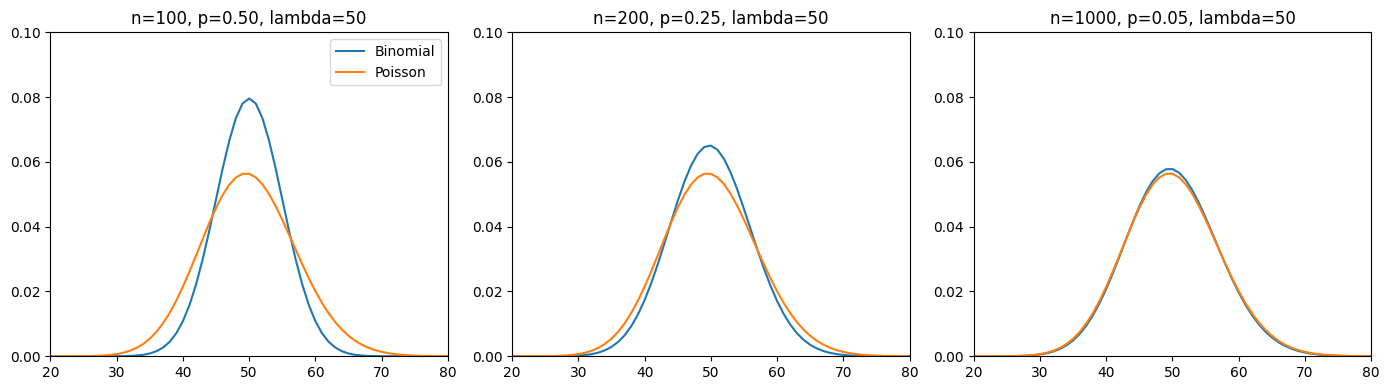

In [12]:
plt.figure(figsize=[14, 4])

x_values = np.arange(100)
params = [(100, 50), (200, 50), (1000, 50)]

for i, (n, mean) in enumerate(params):
    plt.subplot(1, 3, i + 1)
    plt.plot(st.binom(n, mean / n).pmf(x_values), label="Binomial")
    plt.plot(st.poisson(mean).pmf(x_values), label="Poisson")
    plt.xlim(20, 80)
    plt.ylim(0, 0.1)
    plt.title(f'n={n}, p={mean / n:.2f}, lambda={mean}')
    if i == 0:
        plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Trong phần này, chúng ta sẽ cố gắng ước lượng các thuộc tính của phân phối Nhị thức và phân phối Poisson, và so sánh trong một số trường hợp mà sẽ tốt hơn nếu sử dụng phân phối Nhị thức.

Các bạn cần hoàn thành hàm `estimateBinomial` mà nhận đầu vào là một đồ thị ngẫu nhiên và trả về các tham số của phân phối Nhị thức bao gồm `n` và `p`

In [13]:
def estimateBinomial(G: nx.Graph) -> tuple[int, float]:
    # YOUR CODE HERE
    # Number of nodes in the graph
    n = G.number_of_nodes()

    # The maximum possible edges in an undirected graph
    N = n * (n-1)//2

    # The actual number of edges
    m = G.number_of_edges()

    # Calculate the probability p
    p = m / N if N > 0 else 0

    return n, p


In [14]:
# Test 1
G = ERModelGenerator(100, 0.5)
n, p = estimateBinomial(G)
assert abs(p - 0.5) <= 0.05
assert n == 100

In [15]:
# Test 2
G = ERModelGenerator(1000, 0.2)
n, p = estimateBinomial(G)
assert abs(p - 0.5) <= 0.5
assert n == 1000

Viết hàm `estimatePoission` mà nhận đầu vào là một đồ thị ngẫu nhiên và trả về tham số phân phối Poission $\lambda$.

In [16]:
def estimatePoisson(G: nx.Graph) -> float:
    # YOUR CODE HERE
    n, p = estimateBinomial(G)
    return n * p  # lambda = n*p

In [17]:
# Test 1
G = ERModelGenerator(1000, 0.05)
m = estimatePoisson(G)
assert abs(m - 50) <= 1

In [18]:
# Test 2
G = ERModelGenerator(10000, 0.05)
m = estimatePoisson(G)
assert abs(m - 500) <= 1

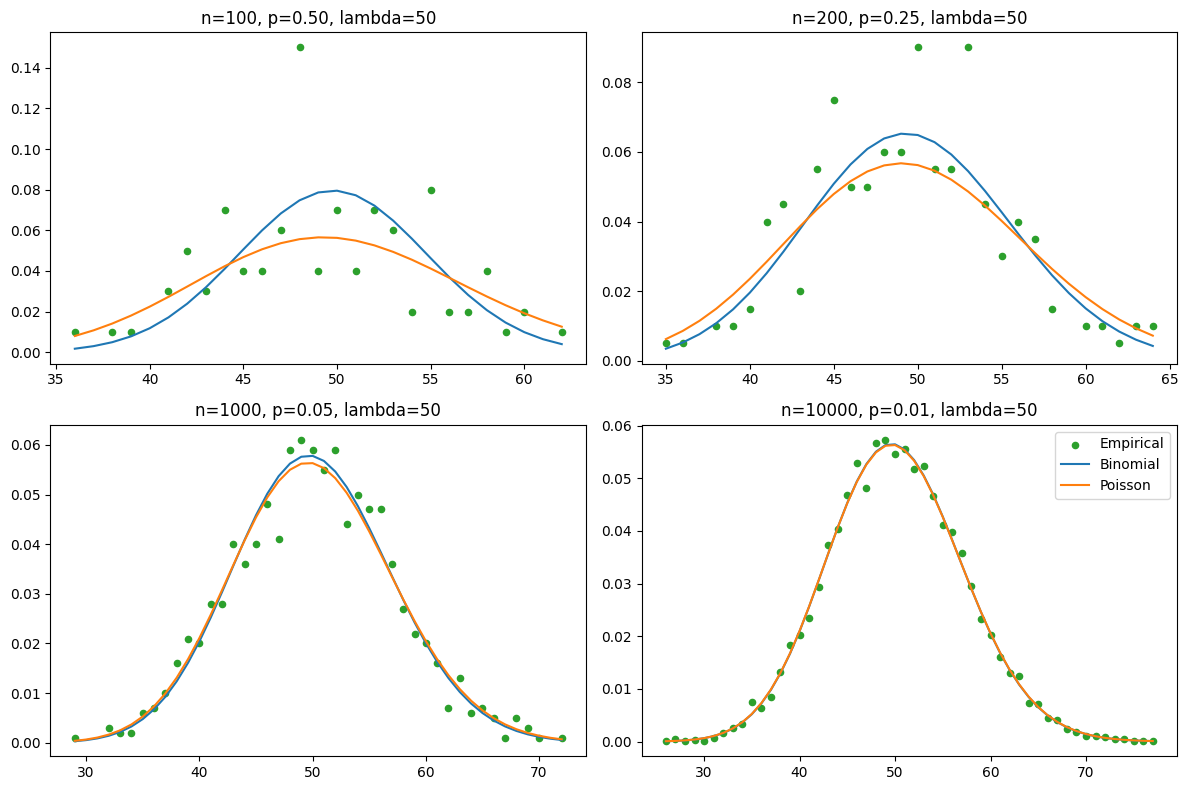

In [19]:
plt.figure(figsize=[12, 8])

params = [(100, 0.5), (200, 0.25), (1000, 0.05), (10000, 0.005)]

for i, (n, p) in enumerate(params):
    plt.subplot(2, 2, i + 1)
    G = ERModelGenerator(n, p)

    # Compute degree density
    degree_hist = np.array(nx.degree_histogram(G))
    degree_density = degree_hist / n
    non_zero_idx = np.nonzero(degree_density)[0]

    # Scatter plot of empirical degree density
    plt.scatter(non_zero_idx, degree_density[non_zero_idx], label="Empirical", color='tab:green', s=20)

    # Degree space for the theoretical distributions
    degrees = list(dict(G.degree).values())
    k_space = np.arange(min(degrees), max(degrees) + 1)

    # Binomial distribution
    binom_n, binom_p = estimateBinomial(G)
    plt.plot(k_space, st.binom(binom_n, binom_p).pmf(k_space), label="Binomial")

    # Poisson distribution
    lambda_poisson = estimatePoisson(G)
    plt.plot(k_space, st.poisson(lambda_poisson).pmf(k_space), label="Poisson")

    plt.title(f'n={n}, p={p:.2f}, lambda={n * p:.0f}')

plt.legend()
plt.tight_layout()
plt.show()

Nhận xét của bạn (nếu có)

YOUR ANSWER HERE

Biểu đồ minh họa sự so sánh giữa phân phối bậc của đồ thị Erdős–Rényi sinh ngẫu nhiên (empirical) với các phân phối lý thuyết (nhị thức và Poisson) trong từng trường hợp:

### **1. Biểu đồ 1: ($n=100$, $p=0.5$, $\lambda=50$)**

- **Đặc điểm:**
  - Kích thước $(n)$ nhỏ và $(p)$ lớn, dẫn đến một mạng lưới dày đặc.
  - Phân phối bậc thực nghiệm (empirical) không khớp hoàn hảo với phân phối nhị thức, nhưng xu hướng chính được phản ánh.
  - Phân phối Poisson không phù hợp trong trường hợp này do Poisson chủ yếu áp dụng tốt khi $(n)$ lớn và $(p)$ nhỏ.

- **Nhận xét:**
  - Phân phối thực nghiệm có xu hướng rộng hơn so với Poisson và dịch nhẹ về bên phải so với nhị thức.

### **2. Biểu đồ 2: $(n=200, p=0.25, \lambda=50)$**

- **Đặc điểm:**
  - Tăng số lượng đỉnh lên $(n=200)$ nhưng giảm xác suất kết nối $(p=0.25)$.
  - Sự khớp giữa phân phối thực nghiệm và phân phối nhị thức được cải thiện.
  - Phân phối Poisson vẫn không phù hợp hoàn toàn nhưng bắt đầu có xu hướng gần đúng hơn.

- **Nhận xét:**
  - Với số đỉnh nhiều hơn và $(p)$ giảm, Poisson bắt đầu tiệm cận với phân phối thực nghiệm.

### **3. Biểu đồ 3: $(n=1000, p=0.05, \lambda=50)$**

- **Đặc điểm:**
  - Số đỉnh $(n)$ tăng đáng kể và $(p)$ nhỏ, làm cho mạng thưa hơn.
  - Phân phối thực nghiệm gần như khớp hoàn hảo với phân phối nhị thức.
  - Phân phối Poisson tiệm cận tốt hơn so với các trường hợp trước.

- **Nhận xét:**
  - Sự khớp giữa Poisson và nhị thức với thực nghiệm trở nên đáng kể, do $(n)$ lớn và $(p)$ nhỏ làm giảm tính phức tạp của phân phối.

### 4. **Biểu đồ 4: $(n=10000, p=0.005, \lambda=50)$**

- **Đặc điểm:**
  - $(n)$ cực lớn, trong khi $(p)$ rất nhỏ, mạng cực kỳ thưa.
  - Phân phối Poisson khớp hoàn toàn với phân phối thực nghiệm, do điều kiện $(n \to \infty, p \to 0)$ và $(n \cdot p = \lambda)$ cố định.

- **Nhận xét:**
  - Đây là ví dụ lý tưởng cho phân phối Poisson, vì đồ thị Erdős–Rényi gần như đạt điều kiện của định lý giới hạn trung tâm cho nhị thức.

---

## **Tổng kết**

### **1. Khi nào nên sử dụng phân phối nhị thức?**
Dựa trên dữ liệu từ các biểu đồ, chúng ta có thể đưa ra các trường hợp nên ưu tiên sử dụng phân phối nhị thức thay vì Poisson:

#### **1.1. Khi $(n)$ không quá lớn và $(p)$ không quá nhỏ**
- Trong các trường hợp như $(n=100, p=0.50)$ (biểu đồ trên cùng bên trái) hoặc $(n=200, p=0.25)$ (biểu đồ trên cùng bên phải), phân phối nhị thức phản ánh chính xác hơn hành vi thực nghiệm so với Poisson.
- Điều này xảy ra vì khi $(n)$ nhỏ và $(p)$ lớn, phân phối nhị thức vẫn duy trì được độ phức tạp của dữ liệu mà Poisson không thể mô tả hết.

#### **1.2. Khi $(\lambda)$ (lambda) không quá nhỏ**
- Nếu $(\lambda = n \cdot p)$ giữ giá trị trung bình, ví dụ $(\lambda = 50)$ trong các biểu đồ trên, thì phân phối nhị thức thể hiện khác biệt rõ so với Poisson, đặc biệt khi $(p)$ không quá nhỏ.
- Với các mạng lưới mà $(n)$ không đủ lớn, nhị thức sẽ cung cấp độ chính xác tốt hơn trước khi hội tụ về Poisson.

### **2. Khi nào phân phối Poisson là lựa chọn phù hợp?**
Ngược lại, phân phối Poisson thích hợp trong các trường hợp khi $(n)$ lớn và $(p)$ rất nhỏ, chẳng hạn như $(n=10000, p=0.005)$ (biểu đồ dưới cùng bên phải). Trong điều kiện này, Poisson gần như khớp hoàn toàn với thực nghiệm do đặc tính của nó phù hợp với mạng lưới cực kỳ thưa, nơi mà $(p)$ tiến về 0 nhưng $(n \cdot p)$ vẫn giữ nguyên.

### **3. Kết luận**
- **Sự chuyển đổi giữa nhị thức và Poisson:** Các biểu đồ đã thể hiện rõ sự dịch chuyển từ phân phối nhị thức sang Poisson khi số mẫu $(n)$ tăng lên. Trong các mạng nhỏ hoặc mạng dày đặc ($p$ lớn), phân phối nhị thức vẫn là lựa chọn tốt hơn vì nó phản ánh chính xác hơn các đặc điểm của đồ thị thực nghiệm.

- **Sự hội tụ lý thuyết:** Khi $(n)$ rất lớn và $(p)$ rất nhỏ, Poisson là lựa chọn tối ưu vì các điều kiện hội tụ đã được thỏa mãn.

- **Ứng dụng thực tế:** Phân phối nhị thức nên được áp dụng trong các mạng trung bình hoặc nhỏ có mật độ kết nối vừa phải, trong khi Poisson phù hợp với các mạng lớn và thưa.

- **Tầm quan trọng của $(\lambda)$:** Giá trị $(\lambda)$ đóng vai trò quyết định trong việc đánh giá sự phù hợp của hai phân phối. Khi $(\lambda)$ không nhỏ nhưng $(n)$ chưa đủ lớn, nhị thức có thể vượt trội hơn Poisson.

Như vậy, quyết định lựa chọn phân phối nhị thức hay Poisson phụ thuộc nhiều vào kích thước đồ thị $(n)$, xác suất kết nối $(p)$, và giá trị $(\lambda)$. Trong các bài toán phân tích mạng thực tế, việc hiểu rõ các yếu tố này sẽ giúp đưa ra lựa chọn phù hợp và chính xác hơn.

## Phần 2: Các mô hình tạo sinh mạng lưới

Trong phần chúng ta sẽ thử tìm hiểu một số mô hình tạo sinh mạng lưới. Để đọc thêm về chúng, các bạn có thể tìm đọc trong cuốn Network science.

### Task 3: Mô hình sinh Watts-Strogatz (2đ)

Trong phần này, chúng ta sẽ thử cài đặt mô hình Watts-Strogatz (mô hình thế giới nhỏ) — kết nối lại một cạnh có xác suất `p` trong mạng vòng với các `n` đỉnh và bậc `k`.

Các bạn hoàn thành viết hàm `ringLattice` trả về một mạng vòng thông thường có `n` đỉnh (0, 1, 2, ..., n-1) và bậc đỉnh `k`. Trong trường hợp bậc đỉnh là số lẻ, nó sẽ làm tròn nó đến số chẵn nhỏ hơn gần nhất.

In [20]:
def ringLattice(n: int, k: int) -> nx.Graph:
    """Hàm tạo đồ thị vòng.

    Parameters
    ----------
    n
        (int) số lượng đỉnh cho trước
    k
        (int) bậc đỉnh

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    # YOUR CODE HERE
    # Ensure k is even by rounding down if it is odd
    if k % 2 !=0:
        k -= 1

    # Create a ring lattice
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # Connect each node to its k nearest neighbors in a circular manner
    for node in range(n):
      for neighbor_offset in range(1, k//2 + 1):  # Connect to k/2 neighbors each side
        # Add "right-side" neighbor
        right_neighbor = (node + neighbor_offset) % n
        G.add_edge(node, right_neighbor)

        # Add "left-side" neighbor
        left_neighbor = (node - neighbor_offset) % n
        G.add_edge(node, left_neighbor)

    return G

In [21]:
# Test 1
assert nx.degree_histogram(ringLattice(10, 2))[2] == 10
assert nx.degree_histogram(ringLattice(10, 3))[2] == 10
assert nx.degree_histogram(ringLattice(10, 4))[4] == 10

In [22]:
# Test 2
assert nx.degree_histogram(ringLattice(20, 3))[2] == 20
assert nx.degree_histogram(ringLattice(20, 4))[4] == 20
assert nx.degree_histogram(ringLattice(20, 5))[4] == 20

In [23]:
# Test 3
assert nx.degree_histogram(ringLattice(100, 6))[6] == 100
assert nx.degree_histogram(ringLattice(100, 8))[8] == 100
assert nx.degree_histogram(ringLattice(100, 10))[10] == 100

Và sau đó, các bạn hoàn thành hàm `rewire` nhận đầu vào là mạng vòng `G`, `node`, tham số mô hình `k` và xác suất `p`. Đối với mọi cạnh bên phải $i$, hàm sẽ nối lại một cạnh (`node`, $i$) thành một cạnh ngẫu nhiên (`node`, $j$) với xác suất `p` trong đó $i \neq j \neq $ `nút`.

Các bạn biết tạo sao chúng ta chỉ xem xét bên phải không? Chúng ta muốn đảm bảo rằng chỉ những cạnh chưa được xét trong các lần lặp trước đó sẽ được kết nối (rewire).

![](https://github.com/ChuLinh02/GraphMining/blob/main/figure/watts_strogatz_how_to_rewire.png?raw=1)

Và để tăng tốc độ tạo sinh, không lọc các nút theo lựa chọn ngẫu nhiên. Nếu nút được chọn tạo ra một cạnh hoặc một vòng lặp hiện có, chỉ cần bỏ qua nút đó.

In [24]:
def rewire(G: nx.Graph, node: int, k: int, p: float) -> nx.Graph:
    """Hàm rewire để nối lại một cạnh (node, i) thành một cạnh (node, j) ngẫu nhiên với xác suất cho trước.

    Parameters
    ----------
    G
        (nx.Graph) đồ thị đầu vào
    node
        (int) input node
    k
        (int) bậc đỉnh
    p
        (float) xác suất nối lại

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    # YOUR CODE HERE
    # Total number of nodes in the graph
    n = G.number_of_nodes()

    # Iterate over the "right-side" neighbors
    for neighbor_offset in range(1, k // 2 + 1):
      # Calculate the original neighbor on the right side
      original_neighbor = (node + neighbor_offset) % n

      # Decide whether to rewire this edge
      r = random.random()
      if (r <= p):
        # Randomly select a new neighbor
        new_neighbor = random.choice(list(G.nodes))
        while new_neighbor == node or new_neighbor == original_neighbor or G.has_edge(node, new_neighbor):
          new_neighbor = random.choice(list(G.nodes))
        # Rewire: remove the original edge and add new edge
        G.remove_edge(node, original_neighbor)
        G.add_edge(node, new_neighbor)

    return G

In [25]:
def WSGraphGenerator(n: int, k: int, p: float) -> nx.Graph:
    """Hàm tạo sinh mạng dựa trên mô hình Watts-Strogatz

    Parameters
    ----------
    n
        (int) số lượng đỉnh cho trước
    k
        (int) bậc đỉnh
    p
        (float) xác suất nối lại

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    G = ringLattice(n, k)
    for node in G.nodes:
        rewire(G, node, k, p)
    return G

In [26]:
# Test 1
n, k, p = 50, 8, 0.1
G = WSGraphGenerator(n, k, p)
assert nx.number_of_nodes(G) == n
assert nx.number_of_edges(G) == int(k / 2 * n)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.watts_strogatz_graph(n, k, p, 1)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

In [27]:
# Test 2
n, k, p = 1000, 10, 0.01
G = WSGraphGenerator(n, k, p)
assert nx.number_of_nodes(G) == n
assert nx.number_of_edges(G) == int(k / 2 * n)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.watts_strogatz_graph(n, k, p, 1)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

In [28]:
# Test 3
n, k, p = 1000, 10, 0.5
G = WSGraphGenerator(n, k, p)
assert nx.number_of_nodes(G) == n
assert nx.number_of_edges(G) == int(k / 2 * n)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.watts_strogatz_graph(n, k, p, 1)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

In [29]:
# Test 4
n, k, p = 1000, 10, 0.99
G = WSGraphGenerator(n, k, p)
assert nx.number_of_nodes(G) == n
assert nx.number_of_edges(G) == int(k / 2 * n)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.watts_strogatz_graph(n, k, p, 1)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

Và chúng ta xem kết quả của từng vòng lặp của thuật toán.

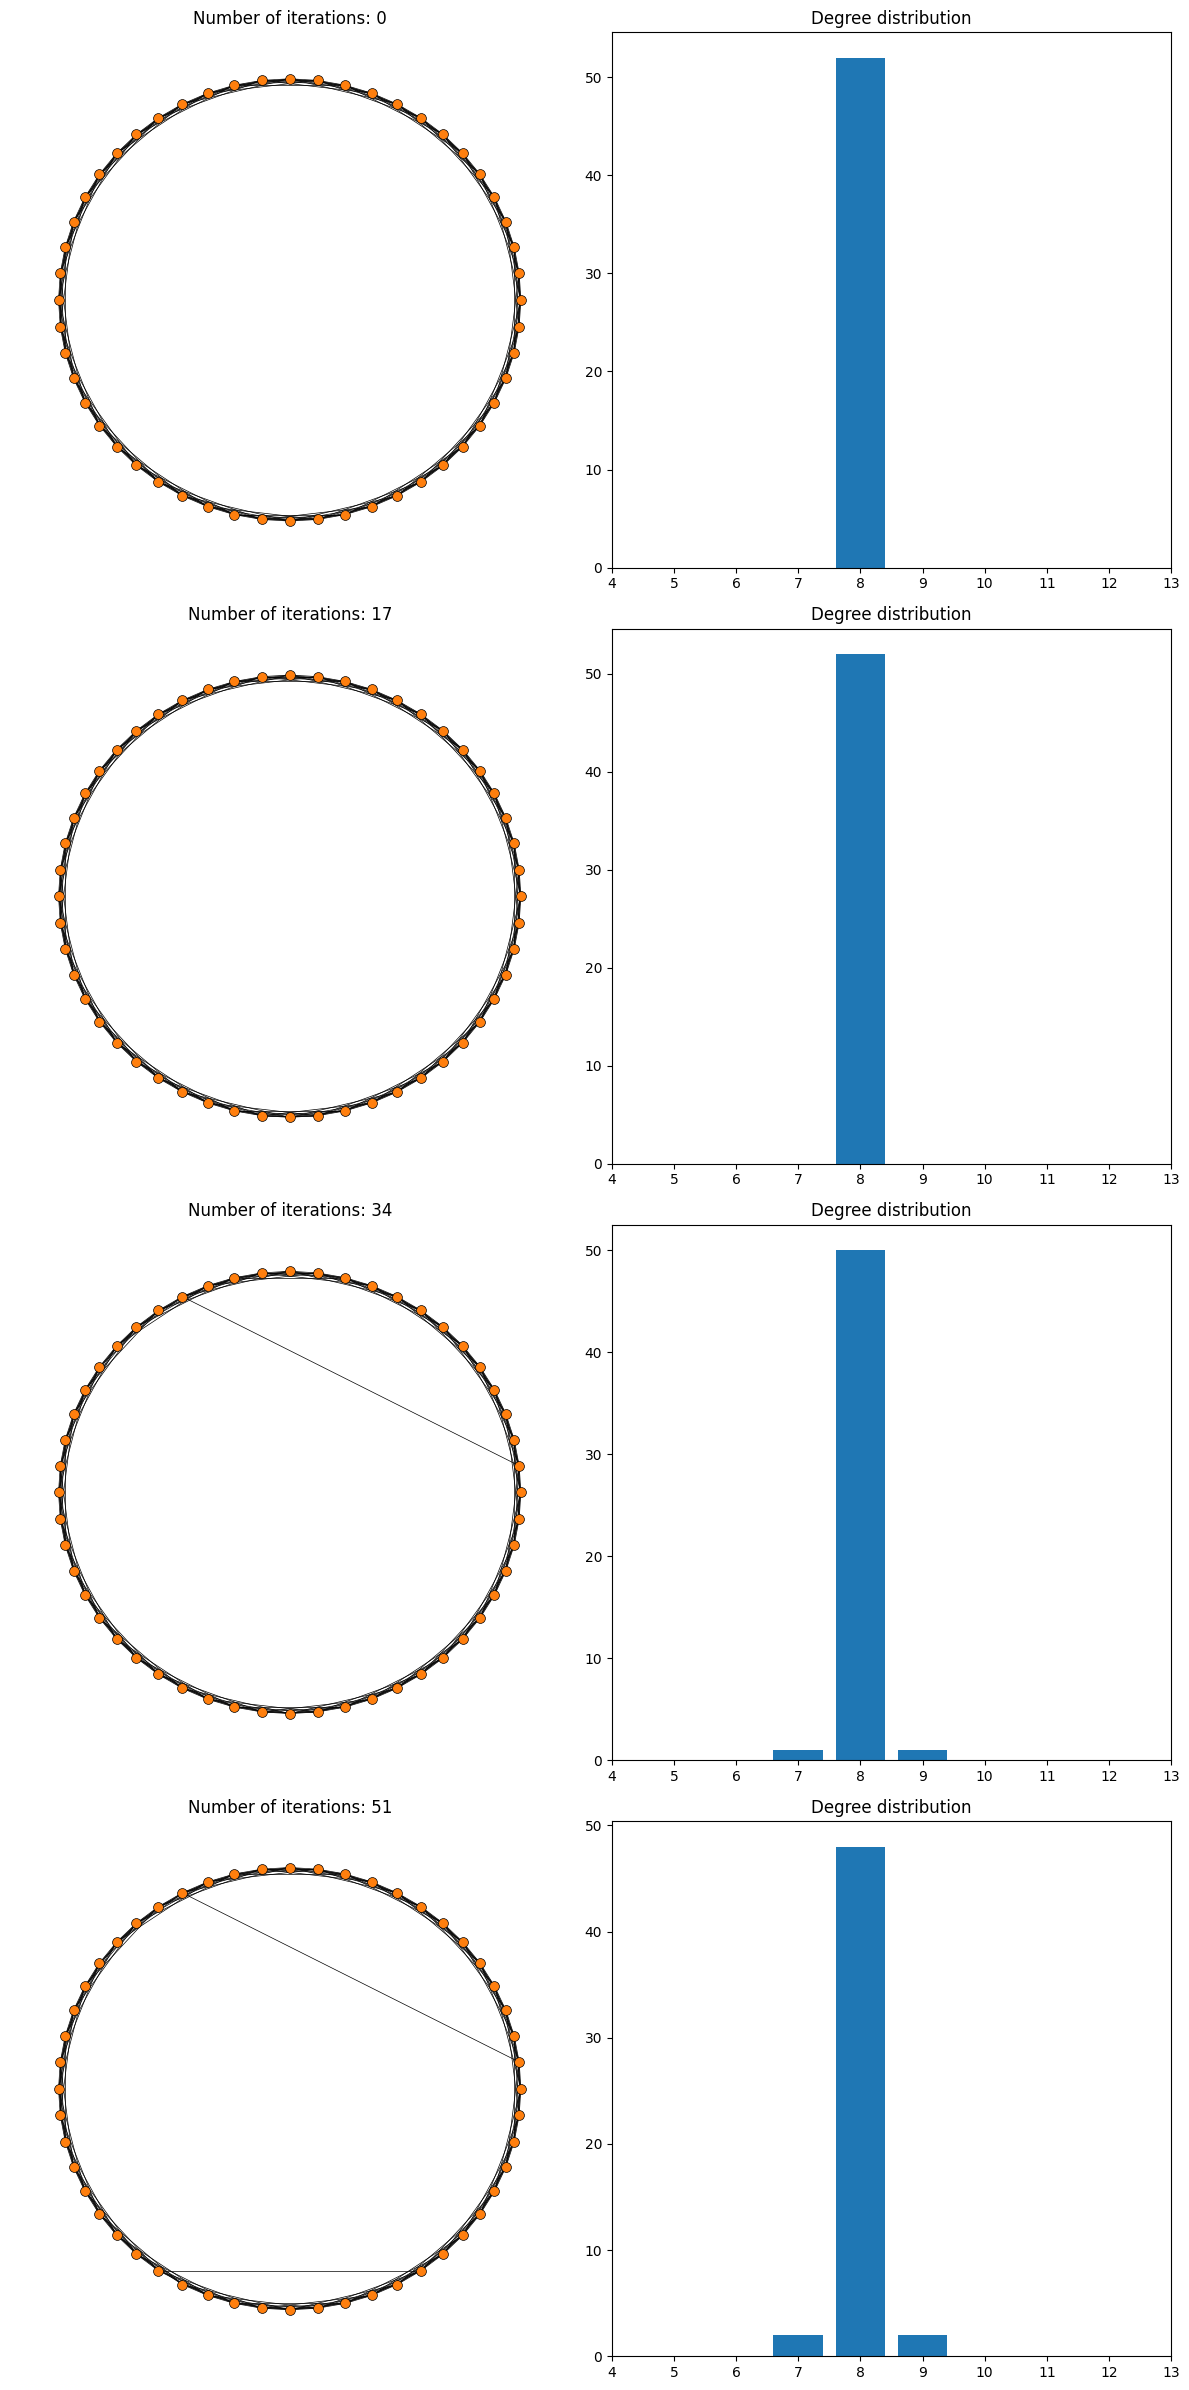

In [30]:
n, k, p = 52, 8, 0.2
G = ringLattice(n, k)
iterations = np.arange(0, n+1, int(n/3))

plt.figure(figsize=(12, 24))

for i, node in enumerate(iterations, 1):
    plt.subplot(4, 2, 2 * (i - 1) + 1)
    plt.title(f'Number of iterations: {node}')
    nx.draw_circular(G, node_size=50, width=0.5, linewidths=0.5, edgecolors='black', node_color='tab:orange')

    plt.subplot(4, 2, 2 * (i - 1) + 2)
    degree_seq = [degree for node, degree in G.degree]
    bins, freq = np.unique(degree_seq, return_counts=True)
    plt.bar(bins, freq)
    plt.xlim((4, 13))
    plt.title('Degree distribution')

    rewire(G, node, k, p)

plt.tight_layout()
plt.show()

### Task 4: Mô hình sinh Barabási–Albert (2đ)

Trong phần này, chúng ta sử thử cài đặt mô hình sinh Barabási–Albert hay còn gọi là preferential attachment model. Mô hình này là quá trình quá triển mà trong đó mỗi đỉnh mới liên kết đến `m` đỉnh đang tồn tại. Bậc đỉnh càng cao, xác suất liên kết càng cao. Cuối cùng, số lượng đỉnh trong đồ thị là `n`.

Bạn sẽ bắt đầu từ một đồ thị hình sao với `m+1` đỉnh. Trong mỗi bước, bạn sẽ tạo ra `m` cạnh giữa một đỉnh mới và các đỉnh đang tồn tại. Xác suất liên kết đến một đỉnh $i$ nào đó là:
$$p(i) = \frac{k_i}{\sum k}$$

Bây giờ, bạn hoàn thành hàm `attach` mà đính một đỉnh `node` đến một đồ thị `G` thông qua `m` cạnh.

Bạn sẽ tạo danh sách có các đỉnh lặp lại từ danh sách các cạnh. Ví dụ: $[(1, 2), (2, 3), (2, 4)] \to [1, 2, 2, 3, 2, 4]$. Chọn ngẫu nhiên đồng nhất từng đỉnh một. Áp dụng `random.choice` thay vì `np.random.choice` để tăng tốc độ tạo.

In [31]:
def attach(node: int, G: nx.Graph, m: int) -> nx.Graph:
    """Hàm attach

    Parameters
    ----------
    node
        (int) đỉnh cho trước
    G
        (nx.Graph) đồ thị cho trước
    m
        (int) số lượng đỉnh đang tồn tại

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    # YOUR CODE HERE
    # Create a list with repeated nodes based on their degree
    repeated_nodes = [n for edge in G.edges() for n in edge]

    # Ensure we add exactly 'm' edges
    selected_nodes = set()
    while len(selected_nodes) < m:
        # Randomly select a node from the repeated list
        selected_node = random.choice(repeated_nodes)
        # Avoid duplicate edges and self-loops
        if selected_node != node and selected_node not in selected_nodes:
            selected_nodes.add(selected_node)

    # Add the new node and connect it to the selected nodes
    G.add_node(node)
    for selected_node in selected_nodes:
        G.add_edge(node, selected_node)

    return G

In [32]:
def BAGraphGenerator(n: int, m: int, random_seed: int = 1) -> nx.Graph:
    """Hàm sinh đồ thị dựa trên mô hình Barabási–Albert

    Parameters
    ----------
    n
        (int) số lượng đỉnh của đồ thị sau cùng
    m
        (int) số lượng đỉnh đang tồn tại
    random_seed, optional
        (int) random seed cho phát sinh ngẫu nhiên, by default 1

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    G = nx.star_graph(m)
    for i in range(1, n - m):
        attach(m + i, G, m)
    return G

In [33]:
# Set up for test
G = nx.star_graph(3)
attach(4, G, 3)
print(nx.number_of_edges(G))
assert nx.number_of_edges(G) == 6 or nx.number_of_edges(G) == 5

6


In [34]:
# Test 1
n, m = 10, 3
G = BAGraphGenerator(n, m)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.barabasi_albert_graph(n, m)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

In [35]:
# Test 2
n, m = 1000, 3
G = BAGraphGenerator(n, m)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.barabasi_albert_graph(n, m)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

In [36]:
# Test 3
n, m = 1000, 20
G = BAGraphGenerator(n, m)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.barabasi_albert_graph(n, m)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

## Phần 3: Bạn biết gì thêm về hai mô hình tạo sinh vừa giới thiệu? Hoặc các mô hình khác.

## **1. Mô hình Watts-Strogatz (WS)**

### **Mô tả**
Mô hình Watts-Strogatz được thiết kế để mô phỏng các mạng **nhỏ-thế-giới (small-world networks)**, đặc trưng bởi:
- **Khoảng cách ngắn giữa các đỉnh:** Các đỉnh trong mạng có thể được kết nối với nhau chỉ qua một số ít bước.
- **Tính cụm cao (clustering):** Các nút lân cận có xu hướng tạo thành nhóm chặt chẽ.

### **Cách hoạt động**
1. **Bắt đầu từ mạng đều (regular network):**
   - Một đồ thị hình vòng được tạo ra, trong đó mỗi đỉnh được kết nối với $( k )$ đỉnh lân cận gần nhất.
   
2. **Tái kết nối ngẫu nhiên (rewiring):**
   - Với xác suất $( p )$, các cạnh được tái kết nối ngẫu nhiên đến một đỉnh khác.  
   - Khi $(p)$ tăng, đồ thị trở nên ngẫu nhiên hơn.

### **Tham số chính**
- $( n )$: Số đỉnh.
- $( k )$: Số lượng đỉnh lân cận mà mỗi đỉnh kết nối trong mạng đều ban đầu.
- $( p )$: Xác suất tái kết nối ngẫu nhiên.

### **Đặc tính quan trọng**
- **Khi $( p = 0 )$:** Mạng vẫn là mạng đều, có tính cụm cao nhưng khoảng cách trung bình lớn.
- **Khi $( p = 1 )$:** Mạng trở thành mạng ngẫu nhiên, khoảng cách trung bình ngắn nhưng tính cụm thấp.
- **Ở giá trị $( p )$ trung gian:** Tính cụm cao và khoảng cách trung bình ngắn đồng thời xuất hiện, tạo nên cấu trúc đặc trưng của mạng nhỏ-thế-giới.

### **Ứng dụng**
- Mô phỏng mạng xã hội, nơi các nhóm người có tính kết nối chặt chẽ nhưng vẫn dễ dàng giao tiếp với nhau.
- Nghiên cứu hệ thống sinh học, chẳng hạn như cấu trúc protein hoặc mạng thần kinh.

---

## **2. Mô hình Barabási–Albert (BA)**

### **Mô tả**
Mô hình Barabási–Albert được sử dụng để tạo sinh các mạng **không đồng nhất (scale-free networks)**, trong đó bậc của các đỉnh tuân theo quy luật lũy thừa (power-law).

### **Cách hoạt động**
1. **Bắt đầu từ một mạng nhỏ ban đầu:**  
   - Khởi tạo đồ thị với $( m+1 )$ đỉnh được kết nối thành hình sao.
   
2. **Thêm đỉnh mới theo nguyên tắc ưu tiên (preferential attachment):**  
   - Mỗi đỉnh mới được thêm vào và kết nối với $( m )$ đỉnh đã tồn tại.  
   - Xác suất kết nối với một đỉnh $( i )$ tỷ lệ thuận với bậc của đỉnh đó:  
     $$p(i) = \frac{k_i}{\sum{k}}$$

     Trong đó, $( k_i )$ là bậc của đỉnh $( i )$.

### **Tham số chính**
- $( n )$: Số lượng đỉnh cuối cùng trong đồ thị.
- $( m )$: Số cạnh mà mỗi đỉnh mới tạo ra.

### **Đặc tính quan trọng**
- **Phân phối bậc:** Phân phối lũy thừa, một số ít đỉnh có bậc rất cao (hubs), trong khi phần lớn các đỉnh khác có bậc thấp.
- **Cấu trúc:** Tính phân cấp cao, các hubs đóng vai trò trung tâm trong mạng.

### **Ứng dụng**
- Mô phỏng mạng xã hội, nơi các cá nhân hoặc nhóm nổi bật có nhiều mối liên hệ hơn.
- Nghiên cứu mạng Internet, nơi một số trang web lớn thu hút phần lớn lưu lượng truy cập.
- Mô phỏng các hệ thống sinh học, chẳng hạn như mạng trao đổi chất hoặc mạng gene.

---

## **3. So sánh Watts-Strogatz và Barabási–Albert**

| **Tiêu chí**              | **Watts-Strogatz**                       | **Barabási–Albert**                   |
|---------------------------|------------------------------------------|---------------------------------------|
| **Ý tưởng chính**         | Mạng nhỏ-thế-giới với tái kết nối ngẫu nhiên. | Mạng không đồng nhất dựa trên kết nối ưu tiên. |
| **Phân phối bậc**         | Không tuân theo power-law.               | Phân phối lũy thừa (power-law).      |
| **Tính cụm (clustering)** | Cao ở $( p )$ nhỏ.                       | Không đảm bảo tính cụm cao.          |
| **Tính ngẫu nhiên**       | Điều chỉnh qua tham số $( p )$.          | Ngẫu nhiên hóa dựa trên ưu tiên.     |
| **Ứng dụng**              | Nghiên cứu xã hội, giao thông, sinh học. | Internet, mạng xã hội, hệ thống sinh học. |

---

## **4. Các mô hình sinh đồ thị khác**

### **Mô hình Erdős–Rényi (ER)**

#### **Giới thiệu**
Mô hình **Erdős–Rényi** (ER) là một trong những mô hình sinh đồ thị ngẫu nhiên đầu tiên, được đặt theo tên hai nhà toán học Paul Erdős và Alfréd Rényi. Đây là mô hình cơ bản để mô phỏng các mạng **ngẫu nhiên thuần túy** và nghiên cứu tính chất của đồ thị khi số lượng đỉnh hoặc cạnh thay đổi.

#### **Cách hoạt động**
1. **Hai biến thể chính của mô hình:**
   - **$G(n, p)$:**
     - Bắt đầu với $( n )$ đỉnh và không có cạnh.
     - Mỗi cặp đỉnh được kết nối với xác suất $( p )$, các cạnh được sinh độc lập với nhau.
   - **$G(n, m)$:**
     - Bắt đầu với $( n )$ đỉnh và không có cạnh.
     - Tạo chính xác $( m )$ cạnh bằng cách chọn ngẫu nhiên các cặp đỉnh để kết nối.

2. **Thuộc tính quan trọng của mô hình $G(n, p)$:**
   - Khi $( p )$ tăng từ 0 đến 1, đồ thị sẽ trải qua một **giai đoạn chuyển pha (phase transition)**:
     - Với $( p < \frac{1}{n} )$: Đồ thị chủ yếu là các thành phần rời rạc.
     - Với $( p \approx \frac{1}{n} )$: Một thành phần lớn (giống như "đám mây khổng lồ") bắt đầu hình thành.
     - Với $( p > \frac{\ln n}{n} )$: Đồ thị trở thành đồ thị liên thông.

#### **Đặc tính chính**
- **Phân phối bậc:** Tuân theo phân phối Poisson, tức là phần lớn các đỉnh có bậc gần với bậc trung bình $( \langle k \rangle = p \cdot (n-1) )$. Không có các đỉnh hubs rõ rệt.
- **Tính ngẫu nhiên:** Toàn bộ mạng được hình thành dựa trên xác suất, không có ưu tiên kết nối nào.
- **Tính cụm:** Tính cụm trong mô hình ER thường thấp hơn các mô hình khác như Watts-Strogatz hoặc Stochastic Block.

#### **Ứng dụng**
- Mô phỏng mạng ngẫu nhiên trong các bài toán lý thuyết đồ thị thuần túy.
- Nghiên cứu hiện tượng chuyển pha (phase transition) trong các hệ thống mạng.
- Các hệ thống không có cấu trúc phân cấp hoặc phân cụm, chẳng hạn như các liên kết ngẫu nhiên trong vật lý mạng.

#### **Hạn chế**
- Không phản ánh được tính chất của nhiều mạng lưới thực tế, chẳng hạn như tính không đồng nhất hoặc tính cụm cao.

### **Mô hình Stochastic Block Model (SBM)**

#### **Giới thiệu**
Mô hình **Stochastic Block Model (SBM)** là một công cụ mạnh mẽ để mô phỏng và phân tích các mạng có cấu trúc **cộng đồng (community structure)**. SBM mở rộng khái niệm từ các mô hình ngẫu nhiên thuần túy như ER bằng cách chia các đỉnh thành các **khối (blocks)** hoặc **cộng đồng**, với các mẫu kết nối xác định rõ ràng giữa và trong các khối.

#### **Cách hoạt động**
1. **Phân chia các đỉnh:**
   - Chia $( n )$ đỉnh thành $( K )$ khối (blocks), mỗi khối có một số đỉnh xác định hoặc theo phân phối xác suất.

2. **Xác suất kết nối:**
   - Xác suất $( P_{ij} )$ để có cạnh giữa đỉnh trong khối $( i )$ và đỉnh trong khối $( j )$ được xác định rõ ràng.  
   - Ví dụ: $( P_{intra} )$ là xác suất giữa các đỉnh trong cùng một khối, và $( P_{inter} )$ là xác suất giữa các đỉnh ở các khối khác nhau.

3. **Sinh đồ thị:**
   - Từng cặp đỉnh được kết nối dựa trên xác suất $( P_{ij} )$, từ đó tạo ra một mạng có cấu trúc cộng đồng.

#### **Đặc tính chính**
- **Tính cụm cao:** Các đỉnh trong cùng một khối thường có xác suất kết nối cao, tạo thành các nhóm chặt chẽ.
- **Cấu trúc rõ ràng:** Phản ánh tốt các mạng có tính phân cụm hoặc cấu trúc phân cấp.
- **Khả năng linh hoạt:** Bằng cách điều chỉnh ma trận xác suất $( P )$, SBM có thể mô phỏng nhiều loại mạng khác nhau, từ mạng đồng nhất đến mạng có sự phân cực rõ rệt.

#### **Ứng dụng**
- **Phân tích mạng xã hội:** Phát hiện các nhóm cộng đồng trong mạng xã hội như nhóm bạn bè, nhóm công việc.
- **Sinh học:** Mô phỏng các tương tác giữa các nhóm protein hoặc gene.
- **Mạng hợp tác:** Nghiên cứu sự hợp tác giữa các quốc gia, tổ chức hoặc nhà khoa học.
- **Hệ thống khuyến nghị:** Mô hình hóa sự tương tác giữa các nhóm người dùng và sản phẩm.

#### **Hạn chế**
- **Độ phức tạp:** Cần xác định trước số khối và ma trận xác suất $( P )$, điều này có thể khó khăn với các mạng lớn và phức tạp.
- **Phụ thuộc tham số:** Hiệu quả của mô hình phụ thuộc rất nhiều vào các tham số đã chọn.

---

### **Nguồn tham khảo**
1. Watts, D. J., & Strogatz, S. H. (1998). Collective dynamics of 'small-world' networks. *Nature, 393*(6684), 440-442.  
2. Barabási, A.-L., & Albert, R. (1999). Emergence of scaling in random networks. *Science, 286*(5439), 509-512.  
3. Newman, M. E. J. (2018). *Networks*. Oxford University Press.  
4. Erdos, P., & Renyi, A. (1960). On the evolution of random graphs. *Publ. Math. Inst. Hung. Acad. Sci.*, 5, 17-60.  
5. Holland, P. W., Laskey, K. B., & Leinhardt, S. (1983). Stochastic blockmodels: First steps. *Social Networks, 5*(2), 109-137.
6. Barabási, A.-L. (2016). *Network Science*. Cambridge University Press.    
